##### Copyright 2022 The Cirq Developers

In [4]:
import cirq
qubit= cirq.GridQubit(0,0)

circuit = cirq.Circuit(
    cirq.X(qubit),
    cirq.measure(qubit,key='m')
)

print("Circuit:")
print(circuit)




Circuit:
(0, 0): ───X───M('m')───


In [6]:
simulator=cirq.Simulator()
result=simulator.run(circuit,repetitions=10)

print("Results:")
print(result)

Results:
m=1111111111


In [7]:
qreg=[cirq.LineQubit(x) for x in range(2)]
circ=cirq.Circuit()
circ.append([cirq.H(qreg[0]),cirq.CNOT(qreg[0],qreg[1])])
print("circuit:")
print(circ)


circuit:
0: ───H───@───
          │
1: ───────X───


In [8]:
circ.append(cirq.measure(*qreg,key="z"))

sim=cirq.Simulator()
res=sim.run(circ,repetitions=100)

print("\n Measurements: ")
print(res.histogram(key="z"))


 Measurements: 
Counter({0: 53, 3: 47})


# **gates  with parameters**

working with parameterized gates in cirq


In [14]:
import matplotlib.pyplot as plt
import sympy
import cirq

qbit=cirq.LineQubit(0)
circ=cirq.Circuit()

symbol=sympy.Symbol("t")

circ.append(cirq.XPowGate(exponent=symbol)(qbit))

circ.append(cirq.measure(qbit,key="z"))

print("Circuit:")
print(circ)

Circuit:
0: ───X^t───M('z')───


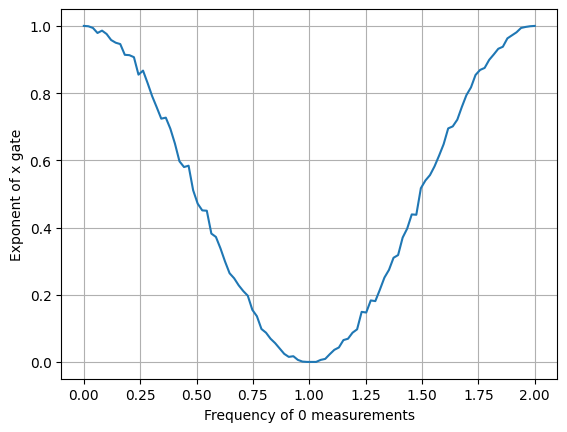

In [16]:
sweep=cirq.Linspace(key=symbol.name,start=0.0,stop=2.0,length=100)
sim=cirq.Simulator()

res=sim.run_sweep(circ,sweep,repetitions=1000)

angles=[x[0][1] for x in sweep.param_tuples()]
zeroes=[res[i].histogram(key="z")[0]/1000 for i in range(len(res))]

plt.plot(angles,zeroes)
plt.xlabel("Frequency of 0 measurements")
plt.ylabel("Exponent of x gate")
plt.grid()
plt.savefig("param-sweep-cirq.pdf",format="pdf")



# The Deutsch-Jozsa Algorithm

In [19]:
import cirq

#get two qubits

q0,q1=cirq.LineQubit.range(2)

# dictionary of oracles

oracles={'0':[],'1':[cirq.X(q1)],'x':[cirq.CNOT(q0,q1)],'notx':[cirq.CNOT(q0,q1),cirq.X(q1)]}



def deutsch_algorithm(oracle):
  """
  yields a circuit for deutsch's algorithm
  given operations implementing the oracle
  """

  yield cirq.X(q1)
  yield cirq.H(q0)
  yield cirq.H(q1)

  yield oracle

  yield cirq.H(q0)
  yield cirq.measure(q0)

# display each circuit for all oracles
for key, oracle in oracles.items():
  print('circuit for {}...'.format(key))
  # print((cirq.Circuit.from_ops(list(deutsch_algorithm(oracle)))),end='\n\\n')
  print(cirq.Circuit(list(deutsch_algorithm(oracle))), end='\n\n')



  #get simulator

simulator=cirq.Simulator()

#run each circuit for all oracles
for key,oracle in oracles.items():
  print('results for {}...'.format(key))
  result=simulator.run(cirq.Circuit(list(deutsch_algorithm(oracle))),repetitions=10)
  print('oracle: {:<4} results: {}'.format(key,result))



circuit for 0...
0: ───H───H───M───

1: ───X───H───────

circuit for 1...
0: ───H───H───M───

1: ───X───H───X───

circuit for x...
0: ───H───────@───H───M───
              │
1: ───X───H───X───────────

circuit for notx...
0: ───H───────@───H───M───
              │
1: ───X───H───X───X───────

results for 0...
oracle: 0    results: q(0)=0000000000
results for 1...
oracle: 1    results: q(0)=0000000000
results for x...
oracle: x    results: q(0)=1111111111
results for notx...
oracle: notx results: q(0)=1111111111
